<a href="https://colab.research.google.com/github/Ruby-pearl1/ores5160-2025/blob/main/week11/week11assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Q1. Reading the CSV File (pandas + csv)

	1.	Use the csv module to open and print the first 5 rows of est2018-pop-res.csv.

	2.	Then use pandas.read_csv() to load the same file into a DataFrame.

	•	Display the shape (rows × columns).

	•	Print the list of column names.

	3.	Which column represents total population? Display the top 5 most populous states


In [10]:
# Filter for state-level data (SUMLEV == 40)
states_df = df[df['SUMLEV'] == 40]

# Compute the average population across all states
average_population = states_df['POPESTIMATE2018'].mean()

print(f"Average population across all states: {average_population:,.0f}")

Average population across all states: 6,353,127


In [11]:
# Group by REGION and sum the population for state-level entries (SUMLEV == 40)
regional_population = df[df['SUMLEV'] == 40].groupby('REGION')['POPESTIMATE2018'].sum()

# Find the region with the highest total population
highest_pop_region = regional_population.idxmax()
highest_pop_value = regional_population.max()

print(f"The region with the highest total population is Region {highest_pop_region} with a population of {highest_pop_value:,.0f}.")

The region with the highest total population is Region 3 with a population of 124,753,948.


In [2]:
import csv

file_path = '/content/est2018-pop-res.csv'

with open(file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for i, row in enumerate(reader):
        if i < 5:
            print(row)
        else:
            break

['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
['010', '0', '0', '00', 'United States', '327167434', '253768092', '77.6']
['040', '3', '6', '01', 'Alabama', '4887871', '3798031', '77.7']
['040', '4', '9', '02', 'Alaska', '737438', '553622', '75.1']
['040', '4', '8', '04', 'Arizona', '7171646', '5528989', '77.1']


In [4]:
import pandas as pd

df = pd.read_csv('/content/est2018-pop-res.csv')

In [7]:
print("DataFrame Shape:", df.shape)
print("DataFrame Columns:", df.columns.tolist())

DataFrame Shape: (53, 8)
DataFrame Columns: ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']


In [8]:
print("DataFrame Shape:", df.shape)
print("DataFrame Columns:", df.columns.tolist())

DataFrame Shape: (53, 8)
DataFrame Columns: ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']


In [9]:
# Assuming 'POPESTIMATE2018' represents the total population
print("The column representing total population is: 'POPESTIMATE2018'\n")

# Filter for states (SUMLEV == 40) and sort by population in descending order
most_populous_states = df[df['SUMLEV'] == 40].sort_values(by='POPESTIMATE2018', ascending=False)

# Display the top 5 most populous states
print("Top 5 most populous states:")
display(most_populous_states[['NAME', 'POPESTIMATE2018']].head(5))

The column representing total population is: 'POPESTIMATE2018'

Top 5 most populous states:


,NAME,POPESTIMATE2018
5,California,39557045
44,Texas,28701845
10,Florida,21299325
33,New York,19542209
39,Pennsylvania,12807060


Q2. Basic Statistical Analysis (pandas)

	1.	Compute the average population across all states.

	2.	Find which region has the highest total population.

	3.	Plot a bar chart showing the population by region (use matplotlib)

In [17]:
# Group by REGION and sum the population for state-level entries (SUMLEV == 40)
regional_population = df[df['SUMLEV'] == 40].groupby('REGION')['POPESTIMATE2018'].sum()

# Find the region with the highest total population
highest_pop_region = regional_population.idxmax()
highest_pop_value = regional_population.max()

print(f"The region with the highest total population is Region {highest_pop_region} with a population of {highest_pop_value:,.0f}.")

The region with the highest total population is Region 3 with a population of 124,753,948.


In [16]:
# Filter for state-level data (SUMLEV == 40)
states_df = df[df['SUMLEV'] == 40]

# Compute the average population across all states
average_population = states_df['POPESTIMATE2018'].mean()

print(f"Average population across all states: {average_population:,.0f}")

Average population across all states: 6,353,127


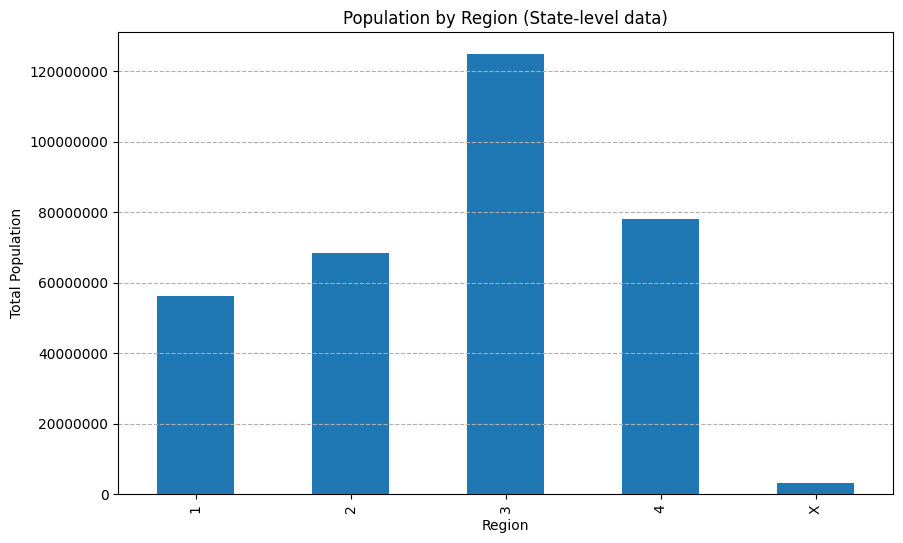

In [12]:
import matplotlib.pyplot as plt

# Group by REGION and sum the population for state-level entries (SUMLEV == 40)
regional_population = df[df['SUMLEV'] == 40].groupby('REGION')['POPESTIMATE2018'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
regional_population.plot(kind='bar')
plt.title('Population by Region (State-level data)')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation for y-axis
plt.grid(axis='y', linestyle='--')
plt.show()

In [19]:
import json

file_path = '/content/patient.json' # Assuming 'patient.json' is in the content directory

with open(file_path, 'r') as f:
    patient_data = json.load(f)

print("Patient data loaded successfully.")

Patient data loaded successfully.


Q3. Parsing the JSON File (FHIR structure)

Using json module:

	1.	Load patient.json into a Python dictionary.

	2.	Extract and print:

	•	Patient’s full official name

	•	Gender and birth date

	•	Current address (city, state, postal code)
  
	3.	Count how many phone numbers the patient has, and list their types (e.g., work, mobile, home).

In [21]:
# Extract Patient's full official name
name_data = patient_data.get('name', [])
full_name = "N/A"
if name_data:
    for name_entry in name_data:
        if name_entry.get('use') == 'official':
            given = ' '.join(name_entry.get('given', []))
            family = name_entry.get('family', '')
            full_name = f"{given} {family}"
            break
    if full_name == "N/A" and name_data[0]: # Fallback to first name if no official name found
        given = ' '.join(name_data[0].get('given', []))
        family = name_data[0].get('family', '')
        full_name = f"{given} {family}"


# Extract Gender and Birth Date
gender = patient_data.get('gender', 'N/A')
birth_date = patient_data.get('birthDate', 'N/A')

# Extract Current Address
address_data = patient_data.get('address', [])
city = "N/A"
state = "N/A"
postal_code = "N/A"

if address_data:
    current_address = address_data[0] # Assuming the first address is the current one
    city = current_address.get('city', 'N/A')
    state = current_address.get('state', 'N/A')
    postal_code = current_address.get('postalCode', 'N/A')

print(f"Patient's Full Official Name: {full_name}")
print(f"Gender: {gender}")
print(f"Birth Date: {birth_date}")
print(f"Current Address: City - {city}, State - {state}, Postal Code - {postal_code}")


Patient's Full Official Name: Peter James Chalmers
Gender: male
Birth Date: 1974-12-25
Current Address: City - PleasantVille, State - Vic, Postal Code - 3999


In [22]:
# Count phone numbers and list their types
telecom_data = patient_data.get('telecom', [])
phone_numbers_count = 0
phone_number_types = []

for entry in telecom_data:
    if entry.get('system') == 'phone':
        phone_numbers_count += 1
        if 'use' in entry:
            phone_number_types.append(entry['use'])

print(f"\nPatient has {phone_numbers_count} phone numbers.")
if phone_number_types:
    print(f"Types of phone numbers: {', '.join(phone_number_types)}.")
else:
    print("No phone number types specified.")


Patient has 3 phone numbers.
Types of phone numbers: work, mobile, old.
